In [1]:
## Importamos las librerias necesarias para poder hacer las predicicones de Rating df elas Apps de Google
#importamos pandas como pd
import pandas as pd

#importamos mssingno como msno
import missingno as msno

#importamos seaborn como sns
import seaborn as sns

#importamos train_test_split
from sklearn.model_selection import train_test_split

#importamos accuacy_score
from sklearn.metrics import accuracy_score

#importamos RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

#importamos LogisticRegression
from sklearn.linear_model import LogisticRegression

#Importamos la libreria de Regresion Lineal
from sklearn.linear_model import LinearRegression

#Importamos numpy
import numpy as np

#Importamos matplotlib.pyplot
import matplotlib.pyplot as plt
##Importamos las librerias para poder evaluar a nuestor modelos:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [2]:
#Leeremos los datos
df = pd.read_csv("https://raw.githubusercontent.com/HackSpacePeru/Datasets_intro_Data_Science/master/google_playstore.csv")

In [3]:
##Exploraremos mas a fondo el DataFrame:
print("Mas informacion sobre el DataFrame:")
print("_____________________________________________________")
df.info()
print("_____________________________________________________")

Mas informacion sobre el DataFrame:
_____________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5788 entries, 0 to 5787
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        5788 non-null   int64  
 1   Rating          5788 non-null   float64
 2   Reviews         5788 non-null   int64  
 3   Installs        5788 non-null   int64  
 4   Type            5788 non-null   object 
 5   Price           5788 non-null   float64
 6   Content Rating  5788 non-null   int64  
 7   Genres          5788 non-null   float64
 8   Android Ver     5788 non-null   int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 407.1+ KB
_____________________________________________________


In [4]:
df.head()

,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Android Ver
0,133,1.0,149723,541,Free,0.0,4764,0.768336,761
1,219,0.0,853,661,Free,0.0,4764,0.641972,1317
2,67,1.0,61881,356,Free,0.0,4764,1.172458,582
3,508,0.0,21943,356,Free,0.0,4764,0.757642,381
4,1114,1.0,6,536,Free,0.0,4764,1.058965,1317


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2577941690>,
      dtype=object)

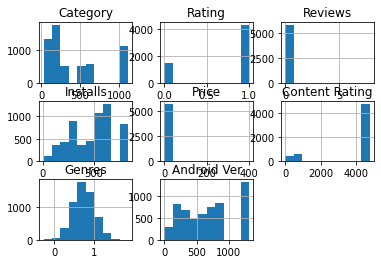

In [5]:
df.hist()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5788 entries, 0 to 5787
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        5788 non-null   int64  
 1   Rating          5788 non-null   float64
 2   Reviews         5788 non-null   int64  
 3   Installs        5788 non-null   int64  
 4   Type            5788 non-null   object 
 5   Price           5788 non-null   float64
 6   Content Rating  5788 non-null   int64  
 7   Genres          5788 non-null   float64
 8   Android Ver     5788 non-null   int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 407.1+ KB


In [7]:
df.describe()

,Category,Rating,Reviews,Installs,Price,Content Rating,Genres,Android Ver
count,5788.000000,5788.000000,5.788000e+03,5788.000000,5788.000000,5788.000000,5788.000000,5788.000000
mean,419.866966,0.745853,2.341452e+05,490.771942,1.022547,3998.374568,0.744623,689.808224
std,373.020929,0.435418,2.174469e+06,220.777426,15.456506,1653.493029,0.269435,414.728610
min,32.000000,0.000000,0.000000e+00,7.000000,0.000000,1.000000,-0.275977,1.000000
25%,143.000000,0.000000,2.300000e+01,298.000000,0.000000,4764.000000,0.561607,381.000000
50%,233.000000,1.000000,8.890000e+02,536.000000,0.000000,4764.000000,0.737766,761.000000
75%,581.000000,1.000000,2.643250e+04,661.000000,0.000000,4764.000000,0.920554,846.000000
max,1114.000000,1.000000,7.815831e+07,841.000000,399.990000,4764.000000,1.866941,1317.000000


In [8]:
df.value_counts()

Category  Rating  Reviews  Installs  Type  Price  Content Rating  Genres    Android Ver
32        0.0     18       536       Free  0.0    4764            1.009395  761            1
508       1.0     53       282       Free  0.0    4764            0.850243  846            1
                  46       536       Free  0.0    4764            0.406570  846            1
                  41       623       Free  0.0    4764            0.778134  137            1
                  40       282       Free  0.0    4764            0.565462  88             1
                                                                                          ..
195       1.0     21186    841       Free  0.0    4764            1.143513  582            1
                  20901    841       Free  0.0    4764            0.773749  1317           1
                  15880    841       Free  0.0    4764            0.444548  761            1
                  15287    841       Free  0.0    4764            0.730700 

In [9]:
##Procesamiento de datos:
df.head(1)

,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Android Ver
0,133,1.0,149723,541,Free,0.0,4764,0.768336,761


In [10]:
##Hacemos el cambio de tipo de dato:
#Cambiamos todos los numero o letras a enteros en 1 y 0
df['Type'] = df['Type'].replace('Free', 1)
df['Type'] = df['Type'].replace('Paid', 0)

##Convertimos los flotantes a interos con astype(int):
df['Rating'] = df['Rating'].astype(int)
#Devolvemos los datos
print(df)

      Category  Rating   Reviews  Installs  Type  Price  Content Rating  \
0          133       1    149723       541     1   0.00            4764   
1          219       0       853       661     1   0.00            4764   
2           67       1     61881       356     1   0.00            4764   
3          508       0     21943       356     1   0.00            4764   
4         1114       1         6       536     1   0.00            4764   
...        ...     ...       ...       ...   ...    ...             ...   
5783       195       1  69119316        12     1   0.00            4764   
5784       170       0        44       536     1   0.00            4764   
5785        46       1      3005       623     0   2.99            4764   
5786      1114       1       708       298     1   0.00            4764   
5787       134       1       144       536     1   0.00             597   

        Genres  Android Ver  
0     0.768336          761  
1     0.641972         1317  
2     1.1

In [11]:
#Reemplazar datos datos nulos por moda o media
#Vamos a buscar valores nulos
df.isnull().values.any()

False

In [12]:
#Devolvemos los datos si tenemos nulos
df.isnull()

,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Android Ver
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
5783,False,False,False,False,False,False,False,False,False
5784,False,False,False,False,False,False,False,False,False
5785,False,False,False,False,False,False,False,False,False
5786,False,False,False,False,False,False,False,False,False


In [13]:
##Preparamos los datos para el modelo de prediccion:
#Quitamos la columna 'Rating'
x_train = df.drop('Rating', axis=1)

#Declaramos y_traing con el dato de Rating
y_train = df['Rating']

#values.counts() = cuenta los numeros que coinciden
y_train.value_counts()

1    4317
0    1471
Name: Rating, dtype: int64

In [14]:
#Devolvemos los datos
print(y_train.value_counts())

1    4317
0    1471
Name: Rating, dtype: int64


In [15]:
#Preparamos el modelo train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_train, y_train,test_size=0.8)

In [16]:
#Comprobamos si x_test esta bien
print('',X_test)

       Category  Reviews  Installs  Type  Price  Content Rating    Genres  \
653        106    42871       841     1    0.0            4764  0.667706   
1719      1114     6007       841     1    0.0            4764  0.323390   
2750       508     4908       308     1    0.0            4764  0.831048   
3276       581   135739       356     1    0.0            4764  0.582485   
3648      1114        4       448     1    0.0            4764  0.583147   
...        ...      ...       ...   ...    ...             ...       ...   
5580       212        2       448     1    0.0             597  0.461115   
2310        46     9307       841     1    0.0            4764  0.368132   
697        219        2       448     1    0.0            4764  0.082737   
2996       143    37882       841     1    0.0             597  1.352761   
63         264        0       124     1    0.0             597  0.670851   

      Android Ver  
653          1317  
1719          381  
2750          761  
3276  

In [17]:
#Comprobamos si y_test esta bien
y_test

653     1
1719    1
2750    0
3276    1
3648    1
       ..
5580    1
2310    0
697     1
2996    1
63      1
Name: Rating, Length: 4631, dtype: int64

In [18]:
#Creamos el modelos Random Forest
rf = RandomForestClassifier(n_jobs = -1,max_depth=3,random_state=1) #creamos la variable rf para guardar el modelo con los parámetros deseados
rf = rf.fit(X_train,y_train) #entrenamos con datos guardados en X_train, y_train
rf_pred = rf.predict(X_test) #generamos las predicciones usando como variables predictoras los datos en X_test
rf_pred #mostramos las predicciones guardadas en la variable rf_pred
##Importamos las metricas para poder el reporte de los resultados:
rf_pred = accuracy_score(y_test,rf_pred)
rf_pred

0.7486503994817534

In [20]:
##Modelo de Regresion Logistica:
#Importamos sklear.metrics
from sklearn.metrics import confusion_matrix, classification_report

#Instacia del clasificacion: logreg
logreg = LogisticRegression()

#Clasificacdor a los de entrenamiento
logreg = logreg.fit(X_train, y_train)

#Modelo de prueba para que haga predicciones después del entrenamiento: y_pred
y_predL = logreg.predict(X_test)

In [21]:
##Evaluamos los resultados del modelo:
print(confusion_matrix(y_test, y_predL))
print("---------------------------------------------------")
print(classification_report(y_test, y_predL))

[[  20 1144]
 [  48 3419]]
---------------------------------------------------
              precision    recall  f1-score   support

           0       0.29      0.02      0.03      1164
           1       0.75      0.99      0.85      3467

    accuracy                           0.74      4631
   macro avg       0.52      0.50      0.44      4631
weighted avg       0.63      0.74      0.65      4631



In [22]:
#Donde sklearn.metrics importamos accury_score
from sklearn.metrics import accuracy_score

In [23]:
#Creando el primer Metodo "predct"
y_pred = logreg.predict(X_test)

#Hacemos las predicciones
predict = accuracy_score(y_test, y_predL)

In [24]:
#Creando el segundo metodo "predict"
model2 = rf.predict(X_test)

#Devolvemos la predicción
predict1 = accuracy_score(y_test, model2)

In [25]:
#Devolvemos la segunda predicción
predict1

0.7486503994817534

In [26]:
##Modelo de regresion lineal:
#Importamos los datos:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [27]:
# instanciamos el modelo
reg_all = LinearRegression()

In [28]:
##Entremos el modelom:
reg_all = reg_all.fit(X_train, y_train)

In [29]:
##Devolvemos el resutaldo del entrenamiento sobre el modelos:
reg_all.predict(X_test)

array([0.66756652, 0.58826267, 0.78406567, ..., 0.7423805 , 0.6630689 ,
       0.86306004])

In [30]:
##Metricas de error:
print(metrics.r2_score(y_test, y_pred))
print("===================================================")
# R^2
print("R^2", reg_all.score(X_test, y_test))

-0.3678680777125911
R^2 -0.007522828651101099


In [31]:
##Valor medio Adsoluto:
mse = np.mean((y_test - y_pred)**2)
mse
print("===================================================")
print(metrics.mean_squared_error(y_test, y_pred))

0.25739581083999136


In [32]:
np.mean(y_test)
print("===================================================")
rmse = np.sqrt(np.mean((y_test - y_pred)**2))
rmse
print("===================================================")
y = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
y
print("===================================================")

In [33]:
##Evaluacion de los modelos:
print("Evaluacion del modelo Lineal")
print("---------------------------------------------------------------------")
print('Resultado del modelo Regresion Lineal: ',predict1)
print("---------------------------------------------------------------------")
print("Promediamos y_test: ",np.mean(y_test))
print("---------------------------------------------------------------------")
print("Resultados de rmse: ",rmse)
print("---------------------------------------------------------------------")
print("raiz cuadrada de la metrica de y_test y y_pred: ", y)
print("---------------------------------------------------------------------")

---------------------------------------------------------------------
Resultado del modelo Regresion Lineal:  0.7486503994817534
---------------------------------------------------------------------
Promediamos y_test:  0.7486503994817534
---------------------------------------------------------------------
Resultados de rmse:  0.5073419072380985
---------------------------------------------------------------------
raiz cuadrada de la metrica de y_test y y_pred:  0.5073419072380985
---------------------------------------------------------------------


In [34]:
print("Evaluacion del modelo Logistico")
print("---------------------------------------------------------------------")
print('Resultado del modelo Regresion Logistica: ',y)
print("---------------------------------------------------------------------")
print("Resultados de las predicciones: ", confusion_matrix(y_test, y_predL))
print("---------------------------------------------------------------------")
print(classification_report(y_test, y_predL))
print("---------------------------------------------------------------------")

Evaluacion del modelo Logistico
---------------------------------------------------------------------
Resultado del modelo Regresion Logistica:  0.5073419072380985
---------------------------------------------------------------------
Resultados de las predicciones:  [[  20 1144]
 [  48 3419]]
---------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.29      0.02      0.03      1164
           1       0.75      0.99      0.85      3467

    accuracy                           0.74      4631
   macro avg       0.52      0.50      0.44      4631
weighted avg       0.63      0.74      0.65      4631

---------------------------------------------------------------------
